In [1]:
import pandas as pd
import umap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.cluster import DBSCAN
import hdbscan

%matplotlib inline

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [3]:
from sklearn.cluster import KMeans

In [4]:
final_df = pd.read_csv("../data/processed/final_df.csv")

In [5]:
final_df.set_index('id_student', inplace=True)

In [6]:
def drop_col (df, list):
    df.drop(columns=(list), inplace=True)
    return df

In [7]:
col_drop = ["region", "gender", "press_mod", "code_presentation", "studied_credits", "highest_education", 'age_band']

In [8]:
drop_col(final_df, col_drop)

,n_assignments,mean_score,final_result,total_clicks,code_module
id_student,,,,,
11391,5,82.000000,Pass,934,AAA
28400,5,66.400000,Pass,1435,AAA
31604,5,76.000000,Pass,2158,AAA
32885,5,54.400000,Pass,1034,AAA
38053,5,68.000000,Pass,2445,AAA
...,...,...,...,...,...
2620947,9,88.888889,Distinction,476,GGG
2645731,9,88.111111,Distinction,893,GGG
2648187,9,76.666667,Pass,312,GGG


In [9]:
idx=final_df.index.tolist()

In [10]:
final_df.index.min()

6516

In [11]:
final_df

,n_assignments,mean_score,final_result,total_clicks,code_module
id_student,,,,,
11391,5,82.000000,Pass,934,AAA
28400,5,66.400000,Pass,1435,AAA
31604,5,76.000000,Pass,2158,AAA
32885,5,54.400000,Pass,1034,AAA
38053,5,68.000000,Pass,2445,AAA
...,...,...,...,...,...
2620947,9,88.888889,Distinction,476,GGG
2645731,9,88.111111,Distinction,893,GGG
2648187,9,76.666667,Pass,312,GGG


## scaling all feats. 

In [12]:
final_df.columns

Index(['n_assignments', 'mean_score', 'final_result', 'total_clicks',
       'code_module'],
      dtype='object')

In [13]:

NUM_FEATS = ['n_assignments', 'mean_score', 'total_clicks']
CAT_FEATS = ['final_result', 'code_module' ]
FEATS = NUM_FEATS + CAT_FEATS

In [14]:
numeric_transformer = \
Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')), 
                ('scaler', StandardScaler())])

In [15]:
categorical_transformer = \
Pipeline(steps=[('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
                ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [16]:
preprocessor = \
ColumnTransformer(transformers=[('num', numeric_transformer, NUM_FEATS),
                                ('cat', categorical_transformer, CAT_FEATS)])

In [17]:
preprocessor

ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('num',
                                 Pipeline(memory=None,
                                          steps=[('imputer',
                                                  SimpleImputer(add_indicator=False,
                                                                copy=True,
                                                                fill_value=None,
                                                                missing_values=nan,
                                                                strategy='mean',
                                                                verbose=0)),
                                                 ('scaler',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                             

In [18]:
final_df_scaled = pd.DataFrame(data=preprocessor.fit_transform(final_df))

In [19]:
final_df_scaled

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.604870,0.589045,-0.409888,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.604870,-0.413900,-0.170668,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.604870,0.203296,0.174555,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.604870,-1.185397,-0.362140,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.604870,-0.311034,0.311593,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26716,0.275801,1.031940,-0.628577,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
26717,0.275801,0.981936,-0.429465,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
26718,0.275801,0.246157,-0.706884,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
26719,-1.265373,1.199812,-0.724551,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [20]:
#final_all_num = final_df.merge(cat_dummies, left_index=True, right_index=True)

In [21]:
#final_all_num

In [22]:
#Dropping Num feats and dummies on final_df
#drop_col(final_df, FEATS)

In [23]:
#cat_dummies

#blind_num_df


In [24]:
#blind_num_df.to_csv('../data/processed/blind_num_df.csv', index=False)
#merge_final_cat.to_csv('../data/processed/cat_merge.csv', index=False)

# UMAP

In [25]:
final_df_scaled = final_df_scaled.to_numpy()

In [26]:
reducer = umap.UMAP(random_state=42)
reducer.fit(final_df_scaled.data)

UMAP(a=None, angular_rp_forest=False, b=None,
     force_approximation_algorithm=False, init='spectral', learning_rate=1.0,
     local_connectivity=1.0, low_memory=False, metric='euclidean',
     metric_kwds=None, min_dist=0.1, n_components=2, n_epochs=None,
     n_neighbors=15, negative_sample_rate=5, output_metric='euclidean',
     output_metric_kwds=None, random_state=42, repulsion_strength=1.0,
     set_op_mix_ratio=1.0, spread=1.0, target_metric='categorical',
     target_metric_kwds=None, target_n_neighbors=-1, target_weight=0.5,
     transform_queue_size=4.0, transform_seed=42, unique=False, verbose=False)

In [27]:
embedding = reducer.transform(final_df_scaled.data)

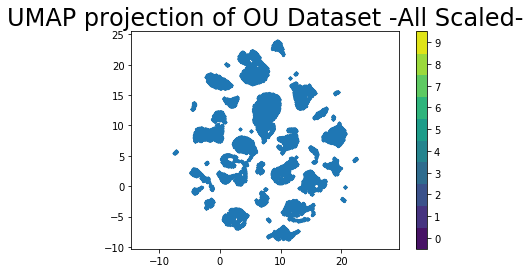

In [28]:
plt.scatter(embedding[:, 0], embedding[:, 1], cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP projection of OU Dataset -All Scaled-', fontsize=24);